# Explore here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
df = pd.read_csv('/workspaces/AK-EA-GG_ProyectoFinalDS-ML/data/loan_dataset.csv')

In [3]:
# Vista inicial
print(f"Dimensiones del dataset: {df.shape}")
print("\nPrimeras filas:")
display(df.head())

# Información sobre tipos de datos y valores nulos
print("\nInformación del dataset:")
df.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe())

Dimensiones del dataset: (396030, 27)

Primeras filas:


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 3942

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


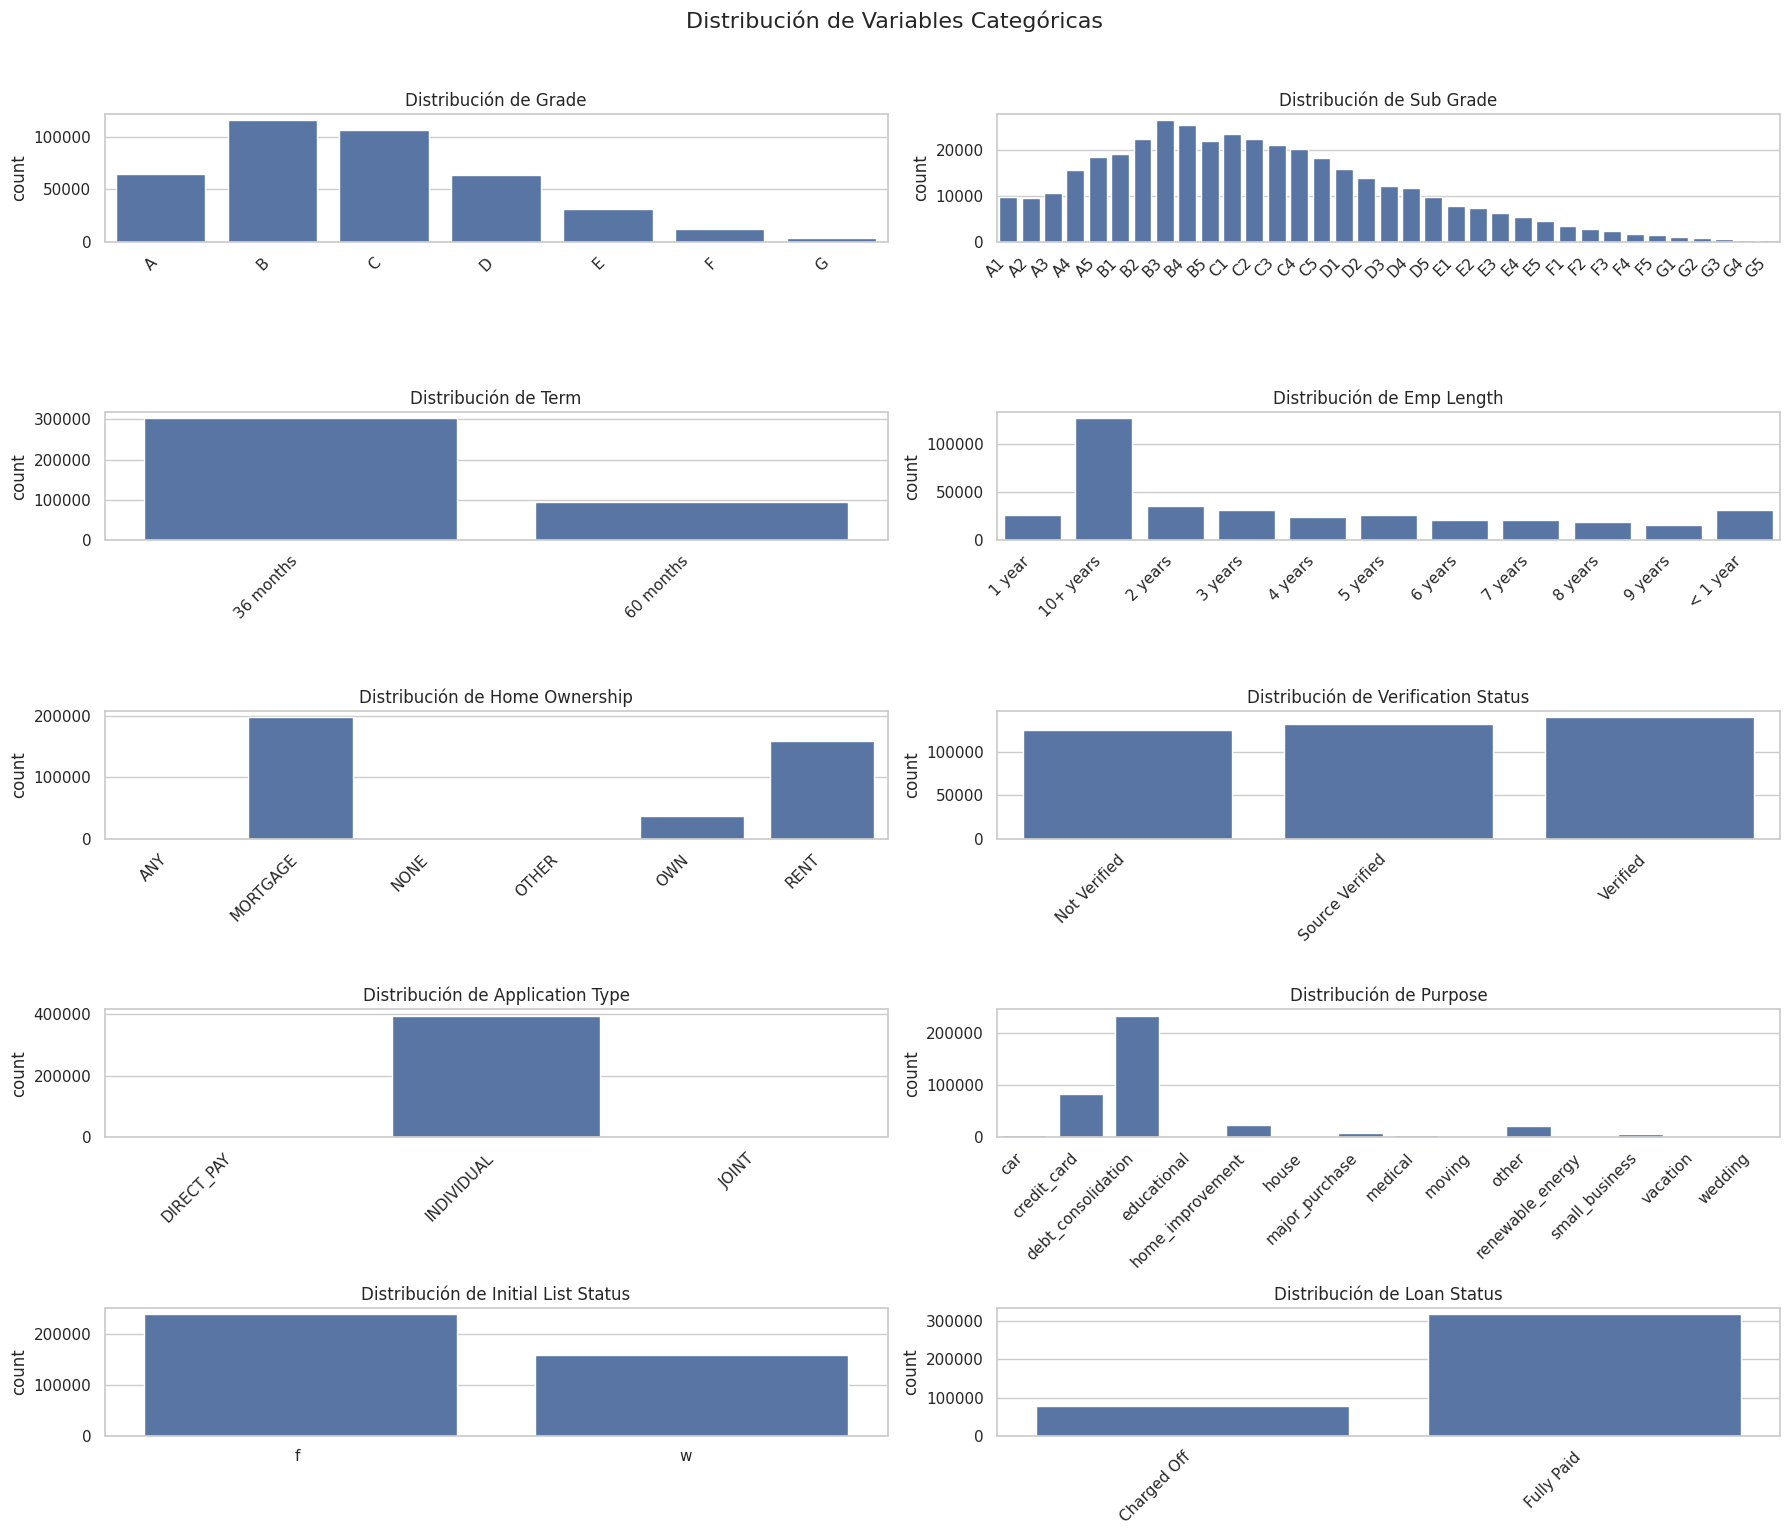

In [4]:
sns.set(style="whitegrid") 
plt.rcParams['font.size'] = 10 

fig, axes = plt.subplots(5, 2, figsize=(18, 15))
fig.suptitle('Distribución de Variables Categóricas', y=1.02, fontsize=16)

variables_cat = [
    "grade", "sub_grade", "term", "emp_length",
    "home_ownership", "verification_status", 
    "application_type", "purpose",
    "initial_list_status", "loan_status"
]

for ax, var in zip(axes.flatten(), variables_cat):
    order = sorted(df[var].dropna().unique())
    sns.countplot(ax=ax, data=df, x=var, order=order)
    ax.set_title(f'Distribución de {var.replace("_", " ").title()}')
    ax.set_xlabel('')
    
    if df[var].nunique() > 5 or any(len(str(x)) > 4 for x in df[var].unique()):
        ax.tick_params(axis='x', rotation=45)
    
    plt.setp(ax.get_xticklabels(), ha="right")

plt.tight_layout()
plt.show()

In [5]:
#para cambiar term a numerico
df['term'] = df['term'].str.split().str[0]
df['term'] = pd.to_numeric(df['term'])

In [6]:
df['state'] = df['address'].str.extract(r',\s*([A-Z]{2})\s*\d{5}')

In [7]:
# Asegurarse de que issue_d esté en formato datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

# Extraer mes y año como columnas separadas
df['issue_month'] = df['issue_d'].dt.month
df['issue_year'] = df['issue_d'].dt.year

In [8]:
df = df.drop("grade", axis=1)
df = df.drop("title", axis=1)
df = df.drop("earliest_cr_line", axis=1)
df = df.drop("application_type", axis=1)
df = df.drop("address", axis=1)
df = df.drop("issue_d", axis=1)
df = df.drop("emp_title", axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   emp_length            377729 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   loan_status           396030 non-null  object 
 10  purpose               396030 non-null  object 
 11  dti                   396030 non-null  float64
 12  open_acc              396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  

In [16]:
# Columnas categóricas
columnas_categoricas = ["home_ownership", "verification_status", "purpose"]

# Inicializar el encoder
encoder = OneHotEncoder(
    sparse_output=False,  # Devuelve un array denso (no sparse)
    drop="first"  # Similar a drop_first en pandas
)

# Aplicar one-hot encoding
encoded_data = encoder.fit_transform(df[columnas_categoricas])

# Convertir a DataFrame y asignar nombres de columnas
encoded_df = pd.DataFrame(
    encoded_data,
    columns=encoder.get_feature_names_out(columnas_categoricas)
)

# Concatenar con el DataFrame original (eliminando las columnas originales)
df_final = pd.concat([
    df.drop(columnas_categoricas, axis=1),
    encoded_df
], axis=1)

# Mostrar resultado
print(df_final.head())


   loan_amnt  term  int_rate  installment sub_grade emp_length  annual_inc  \
0    10000.0    36     11.44       329.48        B4  10+ years    117000.0   
1     8000.0    36     11.99       265.68        B5    4 years     65000.0   
2    15600.0    36     10.49       506.97        B3   < 1 year     43057.0   
3     7200.0    36      6.49       220.65        A2    6 years     54000.0   
4    24375.0    60     17.27       609.33        C5    9 years     55000.0   

   loan_status    dti  open_acc  ...  purpose_home_improvement  purpose_house  \
0   Fully Paid  26.24      16.0  ...                       0.0            0.0   
1   Fully Paid  22.05      17.0  ...                       0.0            0.0   
2   Fully Paid  12.79      13.0  ...                       0.0            0.0   
3   Fully Paid   2.60       6.0  ...                       0.0            0.0   
4  Charged Off  33.95      13.0  ...                       0.0            0.0   

   purpose_major_purchase  purpose_medical p

In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   sub_grade                            396030 non-null  object 
 5   emp_length                           377729 non-null  object 
 6   annual_inc                           396030 non-null  float64
 7   loan_status                          396030 non-null  object 
 8   dti                                  396030 non-null  float64
 9   open_acc                             396030 non-null  float64
 10  pub_rec                              396030 non-null  float64
 11  revol_bal    